#### Metode i primjena vjestacke inteligencije
#### Laboratorijska vjezba 3
#### Student: Masovic Haris
#### Index: 1689/17993

## 0. Dependencies


In [1]:
import sys

!{sys.executable} -m pip install matplotlib ipython


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


## 1. Given code

In [2]:
import numpy as np

class Svm (object):
    """" Svm classifier """
    def __init__ (self, inputDim, outputDim):
        self.W = None
        #########################################################################
        # - Generate a random svm weight matrix to compute loss                 #
        #   with standard normal distribution and Standard deviation = 0.01.    #
        #########################################################################
        sigma =0.01
        self.W = sigma * np.random.randn(inputDim,outputDim)
    def calLoss (self, x, y, reg):
        """
        Svm loss function
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.
        Inputs:
        - x: A numpy array of shape (batchSize, D).
        - y: A numpy array of shape (N,) where value < C.
        - reg: (float) regularization strength.
        Returns a tuple of:
        - loss as single float.
        - gradient with respect to weights self.W (dW) with the same shape of self.W.
        """
        loss = 0.0
        dW = np.zeros_like(self.W)
        #############################################################################
        # - Compute the svm loss and store to loss variable.                        #
        # - Compute gradient and store to dW variable.                              #
        # - Use L2 regularization                                                   #
        #############################################################################
        #Calculating score matrix
        s = x.dot(self.W)
        #Score with yi
        s_yi = s[np.arange(x.shape[0]),y]
        #finding the delta
        delta = s- s_yi[:,np.newaxis]+1
        #loss for samples
        loss_i = np.maximum(0,delta)
        loss_i[np.arange(x.shape[0]),y]=0
        loss = np.sum(loss_i)/x.shape[0]
        #Loss with regularization
        loss += reg*np.sum(self.W*self.W)
        #Calculating ds
        ds = np.zeros_like(delta)
        ds[delta > 0] = 1
        ds[np.arange(x.shape[0]),y] = 0
        ds[np.arange(x.shape[0]),y] = -np.sum(ds, axis=1)
        dW = (1/x.shape[0]) * (x.T).dot(ds)
        dW = dW + (2* reg* self.W)
        return loss, dW
    def train (self, x, y, lr=1e-3, reg=1e-5, iter=100, batchSize=200, verbose=False):
        """
        Train this Svm classifier using stochastic gradient descent.
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.
        Inputs:
        - x: training data of shape (N, D)
        - y: output data of shape (N, ) where value < C
        - lr: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - iter: (integer) total number of iterations.
        - batchSize: (integer) number of example in each batch running.
        - verbose: (boolean) Print log of loss and training accuracy.
        Outputs:
        A list containing the value of the loss at each training iteration.
        """
        # Run stochastic gradient descent to optimize W.
        lossHistory = []
        for i in range(iter):
            xBatch = None
            yBatch = None
            #########################################################################
            # - Sample batchSize from training data and save to xBatch and yBatch   #
            # - After sampling xBatch should have shape (batchSize, D)              #
            #                  yBatch (batchSize, )                                 #
            # - Use that sample for gradient decent optimization.                   #
            # - Update the weights using the gradient and the learning rate.        #
            #########################################################################
            #creating batch
            num_train = np.random.choice(x.shape[0], batchSize)
            xBatch = x[num_train]
            yBatch = y[num_train]
            loss, dW = self.calLoss(xBatch,yBatch,reg)
            self.W= self.W - lr * dW
            lossHistory.append(loss)
            # Print loss for every 100 iterations
            if verbose and i % 100 == 0 and len(lossHistory) != 0:
                print ('Loop {0} loss {1}'.format(i, lossHistory[i]))
        return lossHistory
    def predict (self, x,):
        """
        Predict the y output.
        Inputs:
        - x: training data of shape (N, D)
        Returns:
        - yPred: output data of shape (N, ) where value < C
        """
        yPred = np.zeros(x.shape[0])
        ###########################################################################
        # -  Store the predict output in yPred                                    #
        ###########################################################################
        s = x.dot(self.W)
        yPred = np.argmax(s, axis=1)
        return yPred
    def calAccuracy (self, x, y):
        acc = 0
        ###########################################################################
        # -  Calculate accuracy of the predict value and store to acc variable    #
        ###########################################################################
        yPred = self.predict(x)
        acc = np.mean(y == yPred)*100
        return acc

In [3]:
import numpy as np

class Softmax (object):
    """" Softmax classifier """
    def __init__ (self, inputDim, outputDim):
        self.W = None
        #########################################################################
        # - Generate a random softmax weight matrix to use to compute loss.     #
        #   with standard normal distribution and Standard deviation = 0.01.    #
        #########################################################################
        sigma =0.01
        self.W = sigma * np.random.randn(inputDim,outputDim)
    def calLoss (self, x, y, reg):
        """
        Softmax loss function
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.
        Inputs:
        - x: A numpy array of shape (batchSize, D).
        - y: A numpy array of shape (N,) where value < C.
        - reg: (float) regularization strength.
        Returns a tuple of:
        - loss as single float.
        - gradient with respect to weights self.W (dW) with the same shape of self.W.
        """
        loss = 0.0
        dW = np.zeros_like(self.W)
        #############################################################################
        # - Compute the softmax loss and store to loss variable.                    #
        # - Compute gradient and store to dW variable.                              #
        # - Use L2 regularization                                                   #
        #############################################################################
        #Calculating loss for softmax
        #calculate the score matrix
        N = x.shape[0]
        s =x.dot(self.W)
        # calculating s-max(s)
        s_ = s-np.max(s, axis=1, keepdims= True)
        exp_s_ = np.exp(s_)
        # calculating base
        sum_f = np.sum(exp_s_, axis=1, keepdims=True)
        # calculating probability of incorrect label by dividing by base
        p = exp_s_/sum_f
        p_yi= p[np.arange(N),y]
        # Calculating loss by applying log over the probability
        loss_i = - np.log(p_yi)
        #keep as column vector
        #TODO: add regularization
        loss = np.sum(loss_i)/N
        loss += reg * np.sum(self.W*self.W)
        ds = p.copy()
        ds[np.arange(x.shape[0]),y] += -1
        dW = (x.T).dot(ds)/N
        dW = dW + (2* reg* self.W)
        return loss, dW
    def train (self, x, y, lr=1e-3, reg=1e-5, iter=100, batchSize=200, verbose=False):
        """
        Train this Softmax classifier using stochastic gradient descent.
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.
        Inputs:
        - x: training data of shape (N, D)
        - y: output data of shape (N, ) where value < C
        - lr: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - iter: (integer) total number of iterations.
        - batchSize: (integer) number of example in each batch running.
        - verbose: (boolean) Print log of loss and training accuracy.
        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        # Run stochastic gradient descent to optimize W.
        lossHistory = []
        for i in range(iter):
            xBatch = None
            yBatch = None
            #########################################################################
            # - Sample batchSize from training data and save to xBatch and yBatch   #
            # - After sampling xBatch should have shape (D, batchSize)              #
            #                  yBatch (batchSize, )                                 #
            # - Use that sample for gradient decent optimization.                   #
            # - Update the weights using the gradient and the learning rate.        #
            #                                                                       #
            # Hint:                                                                 #
            # - Use np.random.choice                                                #
            #########################################################################
            num_train = np.random.choice(x.shape[0], batchSize)
            xBatch = x[num_train]
            yBatch = y[num_train]
            loss, dW = self.calLoss(xBatch,yBatch,reg)
            self.W= self.W - lr * dW
            lossHistory.append(loss)
            # Print loss for every 100 iterations
            if verbose and i % 100 == 0 and len(lossHistory) != 0:
                print ('Loop {0} loss {1}'.format(i, lossHistory[i]))
        return lossHistory
    def predict (self, x,):
        """
        Predict the y output.
        Inputs:
        - x: training data of shape (N, D)
        Returns:
        - yPred: output data of shape (N, ) where value < C
        """
        yPred = np.zeros(x.shape[0])
        ###########################################################################
        # -  Store the predict output in yPred                                    #
        ###########################################################################
        s =x.dot(self.W)
        yPred = np.argmax(s, axis=1)
        return yPred
    def calAccuracy (self, x, y):
        acc = 0
        ###########################################################################
        # -  Calculate accuracy of the predict value and store to acc variable    #
        ###########################################################################
        yPred = self.predict(x)
        acc = np.mean(y == yPred)*100
        return acc

## 2. Dataset: CIFAR10

### 2.1 Ucitavanje dataset-a

In [4]:
import os
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import cifar10

mpl.use('Agg')

baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'

classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()


def print_dataset_characteristics(header, dataset):
    print(*['Podaci za:', header])
    print(*['Struktura', header, '=', dataset.shape])
    print(*['Velicina', header, '=', dataset.size])
    print(*['Velicina itema unutar', header, '=', dataset.itemsize, 'byte'])
    print(*['Tip podataka unutar', header, '=', dataset.dtype])
    print(*['Velicina u bajtima za', header, '=', dataset.nbytes])
    print('')
    
print_dataset_characteristics('xTrain set', xTrain)

print_dataset_characteristics('xTest set', xTest)

Podaci za: xTrain set
Struktura xTrain set = (50000, 32, 32, 3)
Velicina xTrain set = 153600000
Velicina itema unutar xTrain set = 1 byte
Tip podataka unutar xTrain set = uint8
Velicina u bajtima za xTrain set = 153600000

Podaci za: xTest set
Struktura xTest set = (10000, 32, 32, 3)
Velicina xTest set = 30720000
Velicina itema unutar xTest set = 1 byte
Tip podataka unutar xTest set = uint8
Velicina u bajtima za xTest set = 30720000



#### 2.1.1 Koja naredba se koristi za utvrdivanje oblika strukture `xTrain`? Ispisite izlaz ove naredbe i objasnite znacenje svih vrijednosti.

- Naredba za utvrdjivanje oblika strukture `xTrain` je `.shape` naredba.
- Rezultat predstavlja n-dimenzionalni numpy array.
- Vidimo da je rezultat `(50000, 32, 32, 3)`, sto znaci da ukupan broj slika u skupu je `50k`, drugi i treci parametar predstavljaju rezoluciju slika, odnosno u nasem slucaju to je `32x32` rezolucija slika, a finalni parametar govori o broju kanala slike, a u nasem slucaju je to `3` sto znaci da u nasem skupu podataka se nalaze `rgb` slike.

#### 2.1.2 Koliko MB zauzima dataset u memoriji? Obrazlozite kako ste dosli do tog zakljucka.

- Kako imamo `50k` slika, a svaka slika je `32x32` i ima `3` kanala, to onda znaci da imamo `50k` slika i `32x32x3 = 3072` elemenata za svaku sliku. Odnosno imamo sveukupno `50k * 3072 = 153600000` elemenata.
- S ozbirom da su svi elementi u `xTrain` datasetu tipa `uint8`, odnosno svaki element uzima `1` bajt, to znaci da skup podataka u memoriji zauzima `153600000` bajti.
- Finalno kad se pretvori u `MB` vrijednost iznosi `146.484375 MB`. Vidimo da se na osnovu `print_dataset_characteristics` funkcije i naredbi (`.shape`, `.size`, `.dtype`, `.nbytes`, `.itemsize`) koji se pozivaju u njoj, vrijednosti poklapaju za `xTrain` dataset.

#### 2.1.3 Odgovorite na ista pitanja za testni skup podataka.

- Kad je u pitanju `xTest` skup podataka, vidimo da je rezultat poziva `.shape` naredbe `(10000, 32, 32, 3)`, sto znaci da ukupan broj slika u skupu je `10k`, drugi i treci parametar predstavljaju rezoluciju slika, odnosno u nasem slucaju to je `32x32` rezolucija slika, a finalni parametar je `3`, sto znaci da u nasem skupu podataka se nalaze `rgb` slike.
- Istom racunicom i logikom, kao pod `2.1.2`, mozemo zakljuciti da testni skup podataka zauzima `30720000` bajti, odnosno `29.296875 MB`. Vidimo da se na osnovu `print_dataset_characteristics` funkcije i naredbi (`.shape`, `.size`, `.dtype`, `.nbytes`, `.itemsize`) koji se pozivaju u njoj, vrijednosti poklapaju za `xTest` dataset.

### 2.2 Prikazivanje slika prije treniranja

Prikaz slika iz train i testnog skupa:


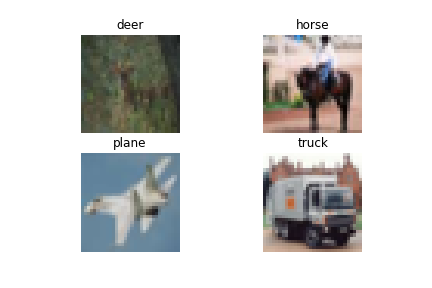

In [5]:
from IPython.display import Image

plt.subplot(221)
plt.imshow(xTrain[10])
plt.axis('off')
plt.title(classesName[yTrain[10][np.array(0)]])
plt.subplot(222)
plt.imshow(xTrain[11])
plt.axis('off')
plt.title(classesName[yTrain[11][np.array(0)]])
plt.subplot(223)
plt.imshow(xTest[10])
plt.axis('off')
plt.title(classesName[yTest[10][np.array(0)]])
plt.subplot(224)
plt.imshow(xTest[11])
plt.axis('off')
plt.title(classesName[yTest[11][np.array(0)]])

image_directory = baseDir + 'svm0.png';

plt.savefig(image_directory)
plt.clf()

# prikazivanje slika
print('Prikaz slika iz train i testnog skupa:')
Image(filename=image_directory) 

#### 2.2.1 Koja bliblioteka i koje naredbe se koriste za prikazivanje slika?

- Biblioteka koja se koristi je `matplotlib` biblioteka. Za prikazivanje se koriste funkcije `imshow` i `subplot`, uz popratne funkcije `title` za rijec iznad slike, `axis='off'` za ukidanje osa.
- Tako definisan plot se spasi kao slika u nasem lokalnom folderu (trenutno gdje se nalazi `ipynb` fajl) i clean-a se plot pomocu `clf` funkcije.
- Na kraju za prikazivanje slike koristena je `IPython.display` biblioteka, te prikazivanje slike uz pomoc `Image` naredbe.

#### 2.2.2 Koje slike ce biti prikazane?

- Pokretanjem inicijalno dobivenog koda, nijedna slika nece biti prikazana, vec ce samo biti spasena u lokalni folder.
- Takodjer definisan je `NON-GUI` backend, odnosno naredbom `mpl.use('Agg')` na pocetku.
- Tako spasena slika je prikazana uz pomoc `IPython.display` biblioteke.

#### 2.2.3 Koja naredba se koristi za snimanje slike na drive?

- Naredba koja se koristi za snimanje slike na drive jeste `plt.savefig(putanja + naziv)`.
- Pokretanjem incijalnog koda, moze se primijetiti u lokalnom folderu slika `svm0.png`.

#### 2.2.4 Kako se odreduje `baseDir`?

- `baseDir` se odredjuje pomoci komande `baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'`.
- `os.path.abspath` vraca apsolutnu putanju do file-a koji joj se proslijedi kao parametar.
- `os.path.dirname` uklanja `__file__` iz citave putanje i daje apsolutnu putanju ka citavom folderu, uz dodavanje `/` na kraj. To na kraju predstavlja `baseDir`.
- Prikaz navedenih funkcija je dat ispod.

In [6]:
print(*['Rezultat poziva abspath:', os.path.abspath('__file__')])
print(*['Rezultat poziva dirname nad abspath:', os.path.dirname(os.path.abspath('__file__')) + '/'])

Rezultat poziva abspath: /Users/harismasovic/Desktop/ds/lab-3/__file__
Rezultat poziva dirname nad abspath: /Users/harismasovic/Desktop/ds/lab-3/


#### 2.2.5 Zasto se koristi `[np.array(0)]` i da li se informacija o klasi moze prikazati bez ove naredbe?

- Naredba `[np.array(0)]` se koristi za indeksiranje, i numpy omogucava koristenje niza kao indexa, odnosno ukoliko se proslijedi niz koji su indexi, dobice se trazeni elementi pod tim indexima.
- Moze, koristenjem obicnog indexa kao npr `[0]`. Primjer toga je dat ispod.

In [7]:
print(*['Koristenje np.array:', classesName[yTrain[10][np.array(0)]]])
print(*['Koristenje obicnog indexa:', classesName[yTrain[10][0]]])

Koristenje np.array: deer
Koristenje obicnog indexa: deer


### 2.3 Organizacija podataka

In [8]:
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

#### 2.3.1 Zasto je dobro koristiti skup za validaciju? Koji parametri se podesavaju ovim skupom?

- Skup za validaciju je dobro koristiti jer on omogucava provjeru hiperparametara algoritma. Pomocu skupa validacije vrsi se podesavanje hiperparametara koji se evaluiraju nad testnim skupom podataka. Ovi parametri predstavljaju parametre koje se koriste prilikom poziva algoritama.
- Kao sto je receno podesavaju se hiperparametri, a to su recimo `k` i `distance` kod `kNN` algoritma.

#### 2.3.2 Koliko elemenata imaju sada skupovi za treniranje, testiranje i validaciju?

- Nakon izvrsenja linije `xVal = xTrain[49000:, :].astype(np.float)`, skup za validaciju ce imati `1k` slika koji su `rgb` i naravno `32x32` rezolucije. Ovo su zadjih `1k` elemanta iz `xTrain` skupa. U `xVal` datasetu ce biti `1000 x 32 x 32 x 3 = 3072000` elemenata.
- Nakon izvrsenja linije `xTrain = xTrain[:49000, :].astype(np.float)`, skup za treniranje ce imati `49k` slika koji su `rgb` i naravno `32x32` rezolucije. U `xTrain` datasetu ce biti `49000 x 32 x 32 x 3 = 150528000` elemenata.
- Nakon izvrsenja linije `xTest = xTest.astype(np.float)`, skup za validaciju ce imati `10k` slika koji su `rgb` i naravno `32x32` rezolucije. U `xTest` datasetu ce biti `10000 x 32 x 32 x 3 = 30720000` elemenata.
- Sve podatke mozemo procitati i pozivom funkcije `print_dataset_characteristics` kao sto je prikazano ispod.

In [9]:
print_dataset_characteristics('novi xVal set', xVal)
print_dataset_characteristics('novi xTrain set', xTrain)
print_dataset_characteristics('novi xTest set', xTest)

Podaci za: novi xVal set
Struktura novi xVal set = (1000, 32, 32, 3)
Velicina novi xVal set = 3072000
Velicina itema unutar novi xVal set = 8 byte
Tip podataka unutar novi xVal set = float64
Velicina u bajtima za novi xVal set = 24576000

Podaci za: novi xTrain set
Struktura novi xTrain set = (49000, 32, 32, 3)
Velicina novi xTrain set = 150528000
Velicina itema unutar novi xTrain set = 8 byte
Tip podataka unutar novi xTrain set = float64
Velicina u bajtima za novi xTrain set = 1204224000

Podaci za: novi xTest set
Struktura novi xTest set = (10000, 32, 32, 3)
Velicina novi xTest set = 30720000
Velicina itema unutar novi xTest set = 8 byte
Tip podataka unutar novi xTest set = float64
Velicina u bajtima za novi xTest set = 245760000



#### 2.3.3 Sta radi naredba `np.squeeze()`? Odgovor pronaci u dokumentaciji Python-a i detaljno obrazloziti za konkretan primjer.

- Naredba `np.squeeze()` uklanja jednodimenzionalne unose iz niza poslanog kao prvi parametar. U nasem primjeru ce se nizovi squashati u jedan niz koji ce predstavljati sve labele indeksirane kao obicni niz.
- Za primjer kod nas mozemo uzeti pocetni array labela `yTrain` koji izgleda na sljedeci nacin (npr): `[[6],[9],[9],[4],[1],...]` i vidimo da pozivom `yTrain = np.squeeze(yTrain[:49000, :])` dobijamo kao rezultat sljedece (prvih 10 elemanata):

In [10]:
print(yTrain[:10])

[6 9 9 4 1 1 2 7 8 3]


#### 2.3.4 Koji je ukupni efekat prethodnih naredbi na organizaciju dataset-a?

- Prva i ocigledna izmjena je uvodjenje validacijskog seta podataka koji ima `1k` slika, sada train set ima `49k` slika, dok testni i dalje ima `10k` slika. Naravno isto vazi i za labele koje prate te slike.
- Druga izmjena je kod labela, a to je nacin cuvanja, to je zasluzna `np.squeeze` komanda objasnjena iznad. Sad se labele cuvaju u jednodimenzionalnom nizu.
- Takodjer, sad svi elementi unutar nizova, tj. u datasetima slika, nisu vise tipa `uint8` vec tipa `float` (`float64`), sto znaci i koristenje vise memorije.

#### 2.3.5 Koliko MB memorije je sada potrebno za sve slike iz dataset-a?

Istom racunicom kao dosad (`x 8` za `float64`), a i putem koda imamo sljedece:
- xVal dataset: `1000 x 32 x 32 x 3 = 3072000` elemenata. Zatim `3072000 x 8 = 24576000 B`. Odnosno u `MB` to iznosi: `23.4375 MB`
- xTrain dataset: `49000 x 32 x 32 x 3 = 150528000` elemenata. Zatim `150528000 x 8 = 1204224000 B`. Odnosno u `MB` to iznosi: `1148.4375 MB`
- xTest dataset: `10000 x 32 x 32 x 3 = 30720000` elemenata. Zatim `30720000 x 8 = 245760000 B`. Odnosno u `MB` to iznosi: `234.375 MB`

### 2.4 Pretprocesiranje slika

Prikaz slika iz train i testnog skupa nakon normalizacije:


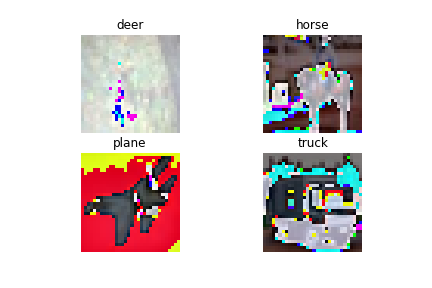

In [11]:
from IPython.display import Image

# 2.4.3
meanImage = np.mean(xTrain, axis=0)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

plt.subplot(221)
plt.imshow(xTrain[10].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTrain[10]])
plt.subplot(222)
plt.imshow(xTrain[11].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTrain[11]])
plt.subplot(223)
plt.imshow(xTest[10].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTest[10]])
plt.subplot(224)
plt.imshow(xTest[11].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTest[11]])

image_directory = baseDir + 'svm1.png';

plt.savefig(image_directory)
plt.clf()

# prikazivanje slika
print('Prikaz slika iz train i testnog skupa nakon normalizacije:')
Image(filename=image_directory) 

#### 2.4.1 Zasto je potrebno napraviti normalizaciju podataka?

- Normalizacija omogucava ucenje fleksibilnijim, bilo za mreze ili neki algoritam. Omogucava da i pozitivne i negativne vrijednosti se iskoriste i iskoriste za dalje ucenje. Podaci se prilagodjavaju odredjenom formatu koji je od koristi za dalje ucenje. Takodjer omogucava isti pogled na podatke od strane modela, i smanjene greske. Normalizacija omogucava brze treniranje i perspektivniji pogled ka podacima.

#### 2.4.2 Kako se realizuje normalizacija?

- U nasem slucaju, normalizacija se realiuje tako sto se izracuna aritmeticka srednja vrijednost po y odnosno vertikalnoj osi (`axis=0`). Nakon dobijanja tih vrijednosti, slike iz sva 3 dataseta su umanjene za vrijednosti `meanImage` dataseta, tj. vrijednosti slika odnosno elemenata unutar sva 3 dataseta su umanjeni za vrijednost elemenata sa istim koordinatama iz dataseta `meanImage`.

#### 2.4.3 Prikazati 4 slike iz skupa za treniranje nakon primjene normalizacije. Koristiti kod dat u sekciji 2.2. Obradite paznju da je oblik podataka sada izmijenjen, pa je potrebno napraviti neke (privremene) promjene na odabranim slikama.

- Iskoristen je kod iz `2.2` i napravljene su promjene po pitanju castanja na `uint8` i koristenje labela. Naglaseno u kodu kao `2.4.3` iznad.

### 2.5 Oblikovanje slika i dodavanje dimenzije za otklon (bias)


In [12]:
# 2.5.1
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1))
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))

print('Oblik podataka u skupovima nakon reshape:')
print('')

# 2.5.2
print_dataset_characteristics('reshape xVal', xVal)
print_dataset_characteristics('reshape xTrain', xTrain)
print_dataset_characteristics('reshape xTest', xTest)

Oblik podataka u skupovima nakon reshape:

Podaci za: reshape xVal
Struktura reshape xVal = (1000, 3072)
Velicina reshape xVal = 3072000
Velicina itema unutar reshape xVal = 8 byte
Tip podataka unutar reshape xVal = float64
Velicina u bajtima za reshape xVal = 24576000

Podaci za: reshape xTrain
Struktura reshape xTrain = (49000, 3072)
Velicina reshape xTrain = 150528000
Velicina itema unutar reshape xTrain = 8 byte
Tip podataka unutar reshape xTrain = float64
Velicina u bajtima za reshape xTrain = 1204224000

Podaci za: reshape xTest
Struktura reshape xTest = (10000, 3072)
Velicina reshape xTest = 30720000
Velicina itema unutar reshape xTest = 8 byte
Tip podataka unutar reshape xTest = float64
Velicina u bajtima za reshape xTest = 245760000



In [13]:
# 2.5.3
xTrain = np.hstack([xTrain, np.ones((xTrain.shape[0], 1))])
xVal = np.hstack([xVal, np.ones((xVal.shape[0], 1))])
xTest = np.hstack([xTest, np.ones((xTest.shape[0], 1))])

print('Oblik podataka u skupovima nakon hstack:')
print('')

# 2.5.4
print_dataset_characteristics('hstack xVal', xVal)
print_dataset_characteristics('hstack xTrain', xTrain)
print_dataset_characteristics('hstack xTest', xTest)

Oblik podataka u skupovima nakon hstack:

Podaci za: hstack xVal
Struktura hstack xVal = (1000, 3073)
Velicina hstack xVal = 3073000
Velicina itema unutar hstack xVal = 8 byte
Tip podataka unutar hstack xVal = float64
Velicina u bajtima za hstack xVal = 24584000

Podaci za: hstack xTrain
Struktura hstack xTrain = (49000, 3073)
Velicina hstack xTrain = 150577000
Velicina itema unutar hstack xTrain = 8 byte
Tip podataka unutar hstack xTrain = float64
Velicina u bajtima za hstack xTrain = 1204616000

Podaci za: hstack xTest
Struktura hstack xTest = (10000, 3073)
Velicina hstack xTest = 30730000
Velicina itema unutar hstack xTest = 8 byte
Tip podataka unutar hstack xTest = float64
Velicina u bajtima za hstack xTest = 245840000



#### 2.5.1 Detaljno objasnite na koji nacin je izvrseno oblikovanje skupova podataka, tj. koje naredbe su koristene?

- Za oblikovanje skupova podataka koristene su naredbe `reshape` i `hstack`.
- Pozivanjem `reshape` mijenja se dimenzija skupova, odnosno nove dimenzije ce biti `(broj_slika, -1)`. U slucaju `-1` to znaci da druga dimenzija biti realizovana na osnovu preostalih dimenzija u pocetnom skupu.
- Za xTrain to znaci da ce `(32, 32, 3)` biti `32x32x3 = 3072`, shodno time ce biti nove dimenzije `xTrain` skupa `(49000, 3072)`. Ista prica vazi i za `xVal`, odnosno `(1000, 3072)` ce biti struktura. Za `xTest` ce biti `(10000, 3072)`. 
- Naglasno je kao `#2.5.1` u kodu.
- Kad je u pitanju `hstack` funkcija, ona ima ulogu da spoji dva niza u jedan, shodno time na vec postojece nizeve od 3 dataset-a ce dodati kao `3073`-i element jedinicu, odnosno za svih `1k`,`49k`,`10k` ce concat-ati array sa istom duzinom sa svim jedinicama.

#### 2.5.2 Koji oblik sada imaju podaci u skupovima? Napisati kod koji ispisuje ove informacije (tri print naredbe).

- Uradjeno vec i naglaseno kao `#2.5.2` u kodu.

#### 2.5.3 Koja naredba se koristi za dodavanje dodatne dimenzije u skupovima? Kako se ona koristi?

- Za dodovanje dodatne dimenzije se koristi `hstack` naredba.
- Ona na vec postojecih `n` elemanata dodaje novi niz jedinica i za svaki element unutar dataset-a se doda i nova dimenzija koja ima vrijednost `1`. Odnosno pomocu ove funkcije se spajaju po kolonama nizovi. Svaki od skupova je prosiren za 1 kolonu i vrijednost u tim kolanama je `1`.
- Prva dimenzija nije promijenjena, a druga jeste i iznosi `3073`.
- Naglaseno u kodu kao `#2.5.3`

#### 2.5.4 Koji oblik sada imaju podaci u skupovima? Napisati kod koji ispisuje ove informacije (tri print naredbe).

- Uradjeno vec i naglaseno kao `#2.5.4` u kodu.

## 3. SVM klasifikator

In [14]:
import random

numClasses = np.max(yTrain) + 1
classifier = Svm(xTrain.shape[1], numClasses)

svm_image = baseDir + 'svm2.png'
rng_counter = 5

def show_random_w_values():
    random_numbers = random.sample(range(0, classifier.W.shape[0] - 1), rng_counter)
    random_classes = random.sample(range(0, len(classesName) - 1), rng_counter)

    for i in range(rng_counter):
        print(*['Vrijednost W od indexa:', random_numbers[i], 'class:', random_classes[i], 'value:', 
                classifier.W[random_numbers[i]][random_classes[i]]])
    print('')
    
#3.0.2
show_random_w_values()

if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(svm_image)
    plt.clf()
    
start_time = time.time()
classificator_data = classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500, verbose=True)
stop_time = time.time()

# 3.0.5
print('')
print(*['Vrijeme potrebno za treniranje svm klasifikatora je:', stop_time - start_time, 'sekundi.'])

Vrijednost W od indexa: 1088 class: 7 value: 0.007626459667155105
Vrijednost W od indexa: 374 class: 3 value: 0.005660293641364146
Vrijednost W od indexa: 2010 class: 5 value: 0.015869579806124207
Vrijednost W od indexa: 812 class: 8 value: -0.02347180328571204
Vrijednost W od indexa: 2240 class: 6 value: -0.0003268868083583896

Loop 0 loss 153285.38603760453
Loop 100 loss 20533.426105109524
Loop 200 loss 2751.1727744468712
Loop 300 loss 371.7919112510707
Loop 400 loss 53.929143301012466
Loop 500 loss 12.415620262867431
Loop 600 loss 6.253291493895795
Loop 700 loss 6.0794237926320935
Loop 800 loss 5.846965776361832
Loop 900 loss 5.511722067800229
Loop 1000 loss 5.681522786224366
Loop 1100 loss 5.584514234692646
Loop 1200 loss 5.5382062972686
Loop 1300 loss 5.500598331590756
Loop 1400 loss 4.9917220915634575

Vrijeme potrebno za treniranje svm klasifikatora je: 2.4450628757476807 sekundi.


Pocetna W svm matrica:


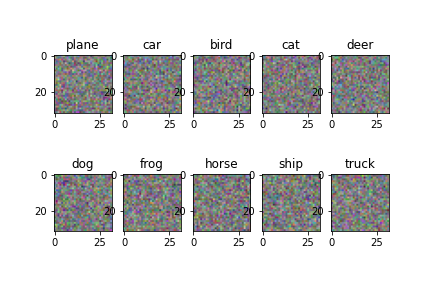

In [15]:
from IPython.display import Image

# prikazivanje rezultata
print('Pocetna W svm matrica:')
Image(filename=svm_image)

#### 3.0.1 Objasnite sta se pokusava prikazati sa iskazom if. Detaljno objasnite postupak.

- If dio ce prikazati tezinske vrijednosti iz matrice W za svaku od klasa u mrezi, ako `W` nije `None`.
- Prije svega se u `tmpW` spremaju sve vrijednosti osim posljednjeg reda iz matrice `W`. Struktura se prilagodjava na oblik `(32, 32, 3, 10)` sa strukture `(3072, 10)`.
- Nakon toga se racunaju minimalna i maximalna vrijednost u n-dimenzionalnom `tmpW` nizu. Izracunte vrijednosti se dalje koriste u `min-max` normalizaciji unutar for petlje.
- U for petlji se racuna `wPlot` varijabla za svaku klasu, a elementi su prikazani od 0 do 255 vrijednosti kako bi mogli prikazani u `matplotlib`-u.
- Nakon toga elementi se cast-aju u tip `uint8`, generisu se subplotovi i spasava se slika pod fajlom `svm_image`.

#### 3.0.2 Isprintajte nekoliko (5) nasumicnih vrijednosti iz matrice W. Sta mozete zakljuciti na osnovu ovih informacija?

- Napravljena je funkcija `show_random_w_values` koja daje 5 random vrijednosti u matrici W.
- Predstavljene vrijednosti se koriste za racunanje funkcije gubitka prilikom treniranja modela.
- Elementi matrice W su random generisani normalnom distribucijom (`0.01` devijacija) i vidimo da su male vrijednosti elemenata.
- Uradjeno vec i oznaceno kao `#3.0.2` u kodu.

#### 3.0.3 Koja naredba se koristi za pokretanje treniranja klasifikatora?

- Naredba koja se koristi za pokretanje klasifikatora je: `classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500, verbose=True)`

#### 3.0.4 Objasnite sve parametre ove naredbe.

- Skup podataka koji se salje `xTrain`, odnosno u nasem slucaju dataset cifar10 i prilagodjen za treniranje,
- Skup labela `yTrain` koje su pridruzene slikama u skupu podataka za treniranje.
- `lr` parametar koji predstavlja hiperparametar `learning rate`. Ovaj parametar predstavlja mjeru prilagodjavanja gradijenta u odnosu na gubitak istog.
- `reg` predstavlja `regulation strength` i koristi se za modifikaciju funkcije gubitka. Takodjer omogucava modifikovanje algoritma ucenja za odredjeni epsilon u vidu sprijecavanja `overfitting`-a.
- `batchSize` parametar koji se vidi iz koda, a ne u pozivu. Ovo predstavlja broj uzoraka koji se procesira prije azuriranja modela u narednoj epohi.
- `iter` predstavlja ukupan broj iteracija modela.
- `verbose` omogucava printanje logova of gubicima i tacnosti u treniranju.

#### 3.0.5 Izmijerite vrijeme potrebno da se istrenira klasifikator i isprintajte ga.

- Uradjeno vec i oznaceno kao `#3.0.5` u kodu.

### 3.1 Izracunavanje tacnosti klasifikatora

#### 3.1.1 Definisati tri poziva funkcije nad tri skupa podatka i izracunati tacnost za sva tri skupa podataka. Prikazati dobijene vrijednosti (na ekranu i u izvjestaju).

In [16]:
x_train_acc = classifier.calAccuracy(xTrain, yTrain)
x_val_acc = classifier.calAccuracy(xVal, yVal)
x_test_acc = classifier.calAccuracy(xTest, yTest)

print(*['xTrain svm accuracy:', x_train_acc, '%'])
print(*['xVal svm accuracy:', x_val_acc, '%'])
print(*['xTest svm accuracy:', x_test_acc, '%'])

xTrain svm accuracy: 35.68775510204082 %
xVal svm accuracy: 36.1 %
xTest svm accuracy: 35.29 %


#### 3.1.2 Graficki prikazati vrijednosti matrice W (kao na pocetku sekcije 3), a zatim i isprintati nekoliko (5) nasumicnih vrijednosti. Sta mozete zakljuciti na osnovu ovih informacija, tj. u odnosu na informacije prikazane u prethodnoj sekciji?

Graficki prikaz svm matrice W:


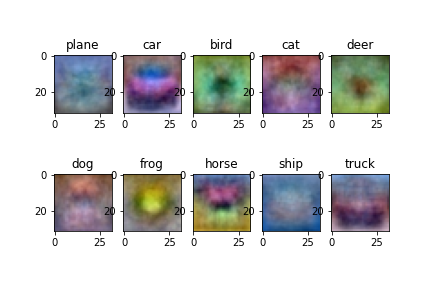

In [17]:
from IPython.display import Image

svm_w_image = baseDir + 'svm3.png'

if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(svm_w_image)
    plt.clf()
    
    
print('Graficki prikaz svm matrice W:')
Image(filename=svm_w_image)

In [18]:
show_random_w_values()

Vrijednost W od indexa: 1337 class: 5 value: -3.997336352314217e-06
Vrijednost W od indexa: 2786 class: 6 value: 1.995202329915621e-05
Vrijednost W od indexa: 179 class: 8 value: 3.698293101871292e-05
Vrijednost W od indexa: 524 class: 0 value: 4.292052940593747e-05
Vrijednost W od indexa: 674 class: 1 value: -2.0021850302722096e-05



- Mozemo vidjeti da su vrijednosti promijenjene u procesu treniranja u matrici `W`.
- Takodjer primijetimo da su vrijednosti manje za nekoliko decimala u odnosu na pocetnu matricu `W`, a razlog ovome predstavlja `lr` parametar, jer kad gledamo formulu `new_w = trenutni_w - lr * grad` vidimo da ce nova tezina zavisi od hiperparametra `lr` i shodno time ciljati da precizira sto bolje sa vise decimala.

#### 3.1.3 Napraviti testiranja na osnovu parametara prikazanih u tabeli 1. i izmijeriti tacnosti (3) za svaki test.

- Mjerenja su napravljena i logovana, kod ispod.

In [19]:
#3.1.4
reg_iterations = [500, 1500, 7500, 12000]
lr_rates = [0.5e-7, 1e-7, 2e-7, 6e-7]

svm_best_reg = -1
svm_best_lr = -1
svm_best_acc = 0
svm_best_all_acc = []
    
for lr in lr_rates:
    print(*['Learning rate:', lr])
    print('')
    for reg in reg_iterations:
        print(*['Regression:', reg])
        classifier.train(xTrain, yTrain, lr=lr, reg=reg, iter=1500)

        x_train_acc = classifier.calAccuracy(xTrain, yTrain)
        x_val_acc = classifier.calAccuracy(xVal, yVal)
        x_test_acc = classifier.calAccuracy(xTest, yTest)

        print(*['xTrain accuracy:', x_train_acc, '%'])
        print(*['xVal accuracy:', x_val_acc, '%'])
        print(*['xTest accuracy:', x_test_acc, '%'])
        print('--------------------')
        print('')
        
        if x_val_acc > svm_best_acc:
            svm_best_acc = x_val_acc
            svm_best_reg = reg
            svm_best_lr = lr
            svm_best_all_acc = [x_test_acc, x_val_acc, x_test_acc]

if len(svm_best_all_acc) > 0:
    print(*['Najbolji model po validacijskoj % tacnosti je za reg:', svm_best_reg, 'lr:', svm_best_lr])
    print(*['Train %:', svm_best_all_acc[0], 'Validacija %:', svm_best_all_acc[1], 'Test %:', svm_best_all_acc[2]])

Learning rate: 5e-08

Regression: 500
xTrain accuracy: 39.82448979591837 %
xVal accuracy: 38.7 %
xTest accuracy: 38.76 %
--------------------

Regression: 1500
xTrain accuracy: 40.563265306122446 %
xVal accuracy: 40.5 %
xTest accuracy: 39.269999999999996 %
--------------------

Regression: 7500
xTrain accuracy: 39.522448979591836 %
xVal accuracy: 39.6 %
xTest accuracy: 38.91 %
--------------------

Regression: 12000
xTrain accuracy: 38.76734693877551 %
xVal accuracy: 39.800000000000004 %
xTest accuracy: 37.7 %
--------------------

Learning rate: 1e-07

Regression: 500
xTrain accuracy: 40.724489795918366 %
xVal accuracy: 40.9 %
xTest accuracy: 39.48 %
--------------------

Regression: 1500
xTrain accuracy: 40.775510204081634 %
xVal accuracy: 40.9 %
xTest accuracy: 39.629999999999995 %
--------------------

Regression: 7500
xTrain accuracy: 38.85918367346939 %
xVal accuracy: 40.0 %
xTest accuracy: 37.78 %
--------------------

Regression: 12000
xTrain accuracy: 37.857142857142854 %
xVal

#### 3.1.4 Na osnovu prethodnih mjerenja, zakljuciti koji skup parametara daje najvecu tacnost.

- Uradjeno vec i u kodu stavljeno `#3.1.4`

In [20]:
print(*['Skup parametara koji je dao najvecu tacnost je za reg:', svm_best_reg, 'lr:', svm_best_lr])

Skup parametara koji je dao najvecu tacnost je za reg: 500 lr: 1e-07


## 4. Softmax klasifikator

#### 4.0.1 Ispod koda za SVM dodajte kod za treniranje Softmax klasifikatora i napravite izmjene specificne za ovaj klasifikator (potrebne su minorne izmjene koda).

In [21]:
numClasses = np.max(yTrain) + 1
classifier = Softmax(xTrain.shape[1], numClasses)

softmax_image = baseDir + 'svm4.png'

#4.0.2
show_random_w_values()

if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(softmax_image)
    plt.clf()
    
#4.0.3
start_time = time.time()
classificator_data = classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500, verbose=True)
stop_time = time.time()

print('')
print(*['Vrijeme potrebno za treniranje softmax klasifikatora je:', stop_time - start_time, 'sekundi.'])

Vrijednost W od indexa: 50 class: 3 value: 0.001194568992486772
Vrijednost W od indexa: 1674 class: 1 value: 0.0070298892876986905
Vrijednost W od indexa: 1830 class: 4 value: -0.0010587479611163862
Vrijednost W od indexa: 511 class: 8 value: 0.014039021517234221
Vrijednost W od indexa: 2858 class: 5 value: -0.025523736919094105

Loop 0 loss 150508.72055553782
Loop 100 loss 20164.0350035721
Loop 200 loss 2701.4027480501386
Loop 300 loss 362.92802576504477
Loop 400 loss 50.29904832770089
Loop 500 loss 8.555465995871765
Loop 600 loss 3.0294262720284424
Loop 700 loss 2.2972262027759633
Loop 800 loss 2.121099290666736
Loop 900 loss 2.1372273458305266
Loop 1000 loss 2.1705509999324377
Loop 1100 loss 2.1083104953125646
Loop 1200 loss 2.139142159154622
Loop 1300 loss 2.1912582043983035
Loop 1400 loss 2.200978617210358

Vrijeme potrebno za treniranje softmax klasifikatora je: 2.927666187286377 sekundi.


Pocetni softmax klasifikator:


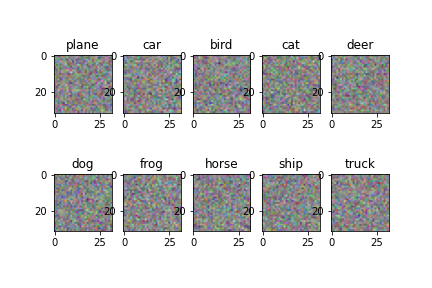

In [22]:
from IPython.display import Image

# prikazivanje rezultata
print('Pocetni softmax klasifikator:')
Image(filename=softmax_image)

#### 4.0.2 Prije treniranja isprintajte nekoliko (5) nasumicnih vrijednosti iz matrice W. Sta mozete zakljuciti na osnovu ovih informacija, tj. u odnosu na informacije dobijene nakon inicijalizacije matrice W kod SVM-a?

- Predstavljene vrijednosti se koriste za racunanje funkcije gubitka prilikom treniranja modela.
- Isto kao kod `svm` elementi matrice W su random generisani normalnom distribucijom (`0.01` devijacija) i vidimo da su male vrijednosti elemenata.
- Posto pocetna funkcija referencira ka istoj varijabli, koja se dinamicki mijenja mozemo pozvati istu funkciju.
- Uradjeno i zabiljezeno kao `#4.0.2` u kodu.

#### 4.0.3 Pokrenuti treniranje klasifikatora i izracunari vrijeme treniranja, te ga prikazati na ekranu i u izvjestaju.

- Uradjeno vec i oznaceno kao `#4.0.3` u kodu.

#### 4.0.4 Definisati tri poziva funkcije `classifier.calAccuracy()` nad tri skupa podataka i izracunati tacnost za sva tri skupa podataka. Prikazati dobijene vrijednosti (na ekranu i u izvjeastaju).

In [23]:
x_train_acc = classifier.calAccuracy(xTrain, yTrain)
x_val_acc = classifier.calAccuracy(xVal, yVal)
x_test_acc = classifier.calAccuracy(xTest, yTest)

print(*['xTrain softmax accuracy:', x_train_acc, '%'])
print(*['xVal softmax accuracy:', x_val_acc, '%'])
print(*['xTest softmax accuracy:', x_test_acc, '%'])

xTrain softmax accuracy: 30.602040816326532 %
xVal softmax accuracy: 31.5 %
xTest softmax accuracy: 30.830000000000002 %


#### 4.0.5 Graficki prikazati vrijednosti matrice W, a zatim i isprintati nekoliko (5) nasumicnih vrijednosti. Sta mozete zakljuciti na osnovu ovih informacija, tj. u odnosu na informacije prikazane u prethodnoj sekciji (nakon treniranja)?

5 nasumicnih vrijednosti W:
Vrijednost W od indexa: 2103 class: 6 value: 2.410724197046947e-06
Vrijednost W od indexa: 2428 class: 0 value: 7.172833312518805e-06
Vrijednost W od indexa: 228 class: 7 value: -9.487417022197598e-07
Vrijednost W od indexa: 592 class: 5 value: -5.964158686385459e-06
Vrijednost W od indexa: 2135 class: 2 value: 3.6110397624089084e-06

Graficki prikaz softmax matrice W:


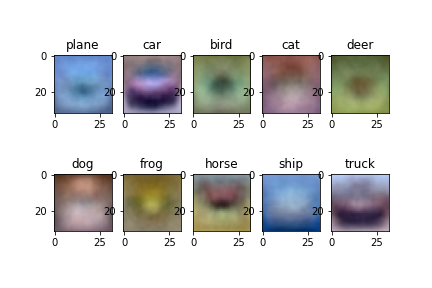

In [24]:
from IPython.display import Image

print('5 nasumicnih vrijednosti W:')
show_random_w_values()

softmax_w_image = baseDir + 'svm5.png'

if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(softmax_w_image)
    plt.clf()
    
    
print('Graficki prikaz softmax matrice W:')
Image(filename=softmax_w_image)

- Mozemo vidjeti da su kod `softmax` isto kao kod `svm` vrijednosti promijenjene u procesu treniranja u matrici `W`.
- Takodjer primijetimo da su vrijednosti manje za nekoliko decimala u odnosu na pocetnu matricu `W`, a razlog ovome predstavlja `lr` parametar, jer kad gledamo formulu `new_w = trenutni_w - lr * dW` vidimo da ce nova tezina zavisi od hiperparametra `lr` i shodno time ciljati da precizira sto bolje sa vise decimala.
- Ono sto se razlikuje u odnosu na `svm` su vrijednosti u medju koracima, a to naravno zavisi od `dW` vrijednosti, odnosno na drugaciji se nacin racuna gradijent u odnosu na `svm`. 

#### 4.0.6 Uporedite graficki prikaz matrice W nakon treniranja kod SVM-a i Softmax-a. Koje zakljucke mozete izvesti?

'svm W:'

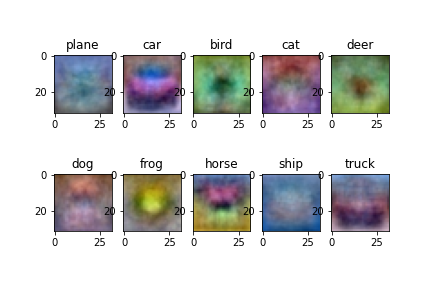

'softmax W:'

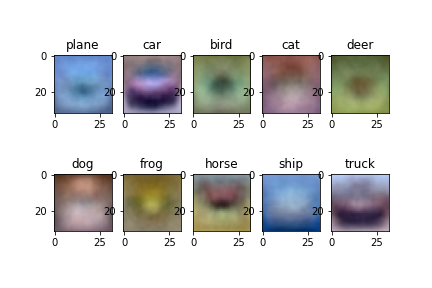

In [25]:
from IPython.display import Image
from IPython.display import display

svm_image = Image(filename=svm_w_image)
softmax_image = Image(filename=softmax_w_image)

print('')
display('svm W:', svm_image, 'softmax W:', softmax_image)
print('')

- Za `svm` klasifikator slike su ostrije i preciznije tj. vrijednosti matrice W, dok softmax klasifikator ima slike koje su vise blurry u odnosu na `svm`.

#### 4.0.7 Napraviti testiranja na osnovu parametara prikazanih u tabeli 2. i izmijeriti tacnosti (3) za svaki test.

In [26]:
reg_iterations = [500, 1500, 7500, 12000]
lr_rates = [0.5e-7, 2e-7, 4e-7, 8e-7]

soft_best_reg = -1
soft_best_lr = -1
soft_best_acc = 0
soft_best_all_acc = []
    
for lr in lr_rates:
    print(*['Learning rate:', lr])
    print('')
    for reg in reg_iterations:
        print(*['Regression:', reg])
        classifier.train(xTrain, yTrain, lr=lr, reg=reg, iter=1500)

        x_train_acc = classifier.calAccuracy(xTrain, yTrain)
        x_val_acc = classifier.calAccuracy(xVal, yVal)
        x_test_acc = classifier.calAccuracy(xTest, yTest)

        print(*['xTrain accuracy:', x_train_acc, '%'])
        print(*['xVal accuracy:', x_val_acc, '%'])
        print(*['xTest accuracy:', x_test_acc, '%'])
        print('--------------------')
        print('')
        
        if x_val_acc > soft_best_acc:
            soft_best_acc = x_val_acc
            soft_best_reg = reg
            soft_best_lr = lr
            soft_best_all_acc = [x_test_acc, x_val_acc, x_test_acc]

if len(soft_best_all_acc) > 0:
    print(*['Najbolji model po validacijskoj % tacnosti je za reg:', soft_best_reg, 'lr:', soft_best_lr])
    print(*['Train %:', soft_best_all_acc[0], 'Validacija %:', soft_best_all_acc[1], 'Test %:', soft_best_all_acc[2]])

Learning rate: 5e-08

Regression: 500
xTrain accuracy: 37.36530612244898 %
xVal accuracy: 38.3 %
xTest accuracy: 36.97 %
--------------------

Regression: 1500
xTrain accuracy: 38.53061224489796 %
xVal accuracy: 40.0 %
xTest accuracy: 38.14 %
--------------------

Regression: 7500
xTrain accuracy: 37.25918367346939 %
xVal accuracy: 38.7 %
xTest accuracy: 36.980000000000004 %
--------------------

Regression: 12000
xTrain accuracy: 35.38979591836735 %
xVal accuracy: 36.9 %
xTest accuracy: 35.39 %
--------------------

Learning rate: 2e-07

Regression: 500
xTrain accuracy: 40.063265306122446 %
xVal accuracy: 40.2 %
xTest accuracy: 39.46 %
--------------------

Regression: 1500
xTrain accuracy: 39.92040816326531 %
xVal accuracy: 40.2 %
xTest accuracy: 39.04 %
--------------------

Regression: 7500
xTrain accuracy: 36.412244897959184 %
xVal accuracy: 38.0 %
xTest accuracy: 36.02 %
--------------------

Regression: 12000
xTrain accuracy: 35.05714285714286 %
xVal accuracy: 37.6 %
xTest accur

#### 4.0.8 Na osnovu prethodnih mjerenja, zakljuciti koji skup parametara daje najvecu tacnost.

In [27]:
print(*['Skup parametara koji je dao najvecu tacnost je za reg:', soft_best_reg, 'lr:', soft_best_lr])

Skup parametara koji je dao najvecu tacnost je za reg: 500 lr: 4e-07


#### 4.0.9 Na osnovu svih mjerenja za SVM i Softmax, koji klasifikator i sa kojim parametrima je imao najvecu tacnost?

In [28]:
print('SVM:')
print(*[svm_best_all_acc, svm_best_acc, svm_best_lr, svm_best_reg])
print('')

print('SOFTMAX:')
print(*[soft_best_all_acc, soft_best_acc, soft_best_lr, soft_best_reg])
print('')

if svm_best_acc > soft_best_acc:
    print(*['Najbolji model je SVM. Po validacijskoj % tacnosti je za reg:', svm_best_reg, 'lr:', svm_best_lr])
    print(*['Train %:', svm_best_all_acc[0], 'Validacija %:', svm_best_all_acc[1], 'Test %:', svm_best_all_acc[2]])
else:
    print(*['Najbolji model je SOFTMAX. Po validacijskoj % tacnosti je za reg:', soft_best_reg, 'lr:', soft_best_lr])
    print(*['Train %:', soft_best_all_acc[0], 'Validacija %:', soft_best_all_acc[1], 'Test %:', soft_best_all_acc[2]])

SVM:
[39.48, 40.9, 39.48] 40.9 1e-07 500

SOFTMAX:
[39.489999999999995, 41.099999999999994, 39.489999999999995] 41.099999999999994 4e-07 500

Najbolji model je SOFTMAX. Po validacijskoj % tacnosti je za reg: 500 lr: 4e-07
Train %: 39.489999999999995 Validacija %: 41.099999999999994 Test %: 39.489999999999995


#### 4.0.10 Uporediti vrijeme izvrsenja ova dva klasifikatora. Generalno, koji je brzi?

- Prilikom rucnog izvrsavanja oba, `softmax` je bio brzi od `svm`, mada ponekad, ali u manjoj mjeri je `svm` davao bolje rezultate.
- Generalno `softmax` je bio brzi.